# Appendix B2: The Inverse Transform of RVs

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The idea

[Inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) is a basic method for [pseudo-random number sampling](https://en.wikipedia.org/wiki/Pseudo-random_number_sampling), i.e. for generating sample numbers at random from any probability distribution given its cumulative distribution function. That is, by drawing from a uniform distribution, we make it possible to draw from the other distribution in question.

Let's start by defining uniform distribution $U(0,1)$ which geneerates random numbers $Z\sim U(0,1)$ falling on $[0,1]$ range. Now let's look for a way of transforming random number $Z$ with $p(z)=\frac{1}{1-0}$ unifrom pdf into a function $X(Z)$ where x is distributed according to some pdf $p(x)$. The probability to find $x$ between $x$ and $x+dx$ is equal to:

$$p(x)dx = p(z)dz = dz$$

This relation is simply transform of variables. Now the key point to realize is that integrals from over $[-\infty, x(z)]$ for X and $[0, z]$ for Z are equal (these are comulative distribution functions (CDF). 

$$
\int_{-\infty}^{x(z)} p(x') dx' = \int_0^z dz'= z
$$

Thus if we can (i) integrate expression on the left analytically and (ii) solve for $x$ then we are done! 
For most of the pdf at least one of the two is not possible. Below is a typical example where both (i) and (ii) states are easily done. 

#### Example: Drawing from the exponential distribution.


 For example, lets assume we would like
to generate random numbers that follow the exponential distribution
$$p(x) = \frac{1}{\lambda} e^{-x/\lambda}$$ 

for $x\ge0$ and $f(x)=0$ otherwise. Following the recipe from the above we have

$$u = \int_{0}^{x} \frac{1}{\lambda} e^{-x'/\lambda} dx'  = 1- e^{-x/\lambda} $$ 

Solving for $x$ we get

$$x = - \lambda \ln (1-u) $$

### Let us formalize this procedure:

1. **Get a uniform sample $u$ from $U(0,1)$**
2. **Solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire.** 
3. **Repeat.** 

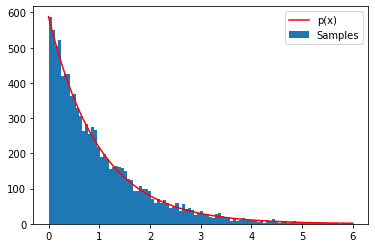

In [2]:
# probability distribution we're trying to calculate
p = lambda x: np.exp(-x)

# CDF of p
CDF = lambda x: 1-np.exp(-x)

# invert the CDF
invCDF = lambda r: -np.log(1-r)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 6 # the upper limit of our domain

# range limits
rmin = CDF(xmin)
rmax = CDF(xmax)

N = 10000 # the total of samples we wish to generate

# generate uniform samples in our range then invert the CDF
# to get samples of our target distribution
R = np.random.uniform(rmin, rmax, N)
X = invCDF(R)

# get the histogram info
hinfo = np.histogram(X,100)

# plot the histogram
plt.hist(X,bins=100, label=u'Samples');

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')

# turn on the legend
plt.legend()

### [Box-Muller algorithm](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)

In many cases the integral to calculate the CDF may not be easy to calculate analytically
and we need to come with clever algorithms. For example 
there is no closed form formula for the integral of the normal distribution
$ I=\frac{1}{2\pi} \int_{-\infty}^{x} e^{-x'^2/2}dx' $.

The **Box Muller method** is a brilliant trick to overcome this by producing two independent standard normals
from two independent uniforms. 

The idea is this. Consider the  product of two independent normals N(0,1):

$$ X \sim N(0,1), Y \sim N(0,1) \implies X,Y \sim N(0,1)N(0,1)$$

The pdf then is:

$$f_{XY}(x,y)  =  \frac{1}{\sqrt{2\pi}} e^{-x^2/2} \times \frac{1}{\sqrt{2\pi}} e^{-y^2/2} = \frac{1}{2\pi} \times e^{-r^2/2}$$

where $r^2 = x^2 + y^2$.

If you think of this in terms of polar co-ordinates $r$ and $\theta$, we have

$$\Theta \sim U(0, 2\pi) \\   S = R^2 \sim Exp(1/2)$$

From the inverse method for the exponential above:

$$ s = r^2 = -2 ln(1-u) $$

where u is a sample from $U \sim U(0,1)$. Now if $U \sim U(0,1)$, then $1-U \sim U(0,1)$.

Thus  we can write:

$$r = \sqrt{-2\,ln(u_1)} \\ \\ \theta = 2\pi\, u_2$$

where $u_1$ and $u_2$ are both drawn from a $U(0,1)$. Now we can use:

$$x = r\,cos\theta, y = r\,sin\theta$$

to generate samples for the normally distributed random variables $X$ and $Y$.

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


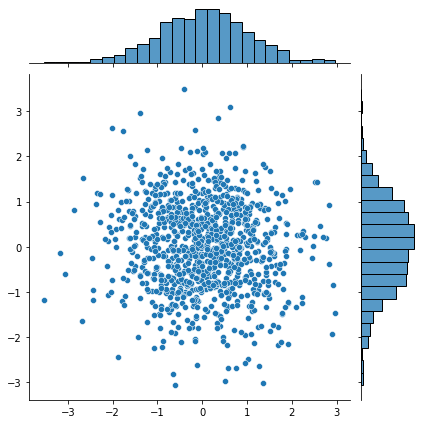

In [3]:
n=1000
u1 = np.random.random(n)
u2 = np.random.random(n)

r_squared = -2*np.log(u1)
r = np.sqrt(r_squared)

theta = 2*np.pi*u2
x = r*np.cos(theta)
y = r*np.sin(theta)

sns.jointplot(x, y, kind='scatter')